In [148]:
# import libraries
import os
from pathlib import Path
import pandas as pd
import urllib
import json
import zipfile
from zipfile import ZipFile
from openpyxl import Workbook
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

In [149]:
# clear folder from previous exercises leaving only trip data zip file
dir_name = r"C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data"
folder = os.listdir(dir_name)

for item in folder:
    if item.endswith(".csv") or item.endswith(".txt"):
        os.remove(os.path.join(dir_name, item))

In [150]:
# assign path to data folder
data_path = r"C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data"

# file name to download
file = "OpenDataDC_Taxi_2023.zip"

# establish file path
fullfilename = os.path.join(data_path, file)

# assign ZIP file to variable
items = zipfile.ZipFile(fullfilename)

# show files in ZIP
print(items.namelist())

# opening ZIP file in read mode
with zipfile.ZipFile(fullfilename, "r") as file:

    # extract all files inside the ZIP file
    file.extractall(data_path)

['README_DC_Taxicab_trip.txt', 'taxi_202301.csv', 'taxi_202302.csv', 'taxi_202303.csv', 'taxi_202304.csv', 'taxi_202305.csv', 'taxi_202306.csv', 'taxi_202307.csv', 'taxi_202308.csv', 'taxi_202309.csv', 'taxi_202310.csv', 'taxi_202311.csv', 'taxi_202312.csv']


In [151]:
# load monthly files into a single df and visualize process using glob library
## data types indicated to improve performance and columns selected to consolidate df
import glob

import glob
all_dfs = []
for one_filename in glob.glob(r'C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi*.csv'):
    print(f'Loading {one_filename}')
    new_df= pd.read_csv(one_filename,
                 usecols=['OBJECTID', 'ORIGINDATETIME_TR', 'DESTINATIONDATETIME_TR', 'ORIGINZIP', 'DESTINATIONZIP', 'MILEAGE', 'DURATION', 'FAREAMOUNT', 'ORIGIN_BLOCK_LATITUDE', 'ORIGIN_BLOCK_LONGITUDE', 'ORIGINZIP']) 
    all_dfs.append(new_df)

len(all_dfs)

Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi_202301.csv
Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi_202302.csv
Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi_202303.csv
Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi_202304.csv
Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi_202305.csv
Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi_202306.csv
Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents

12

In [152]:
# combine multiple dataframes into one and preview data
taxi_trips = pd.concat(all_dfs)

rows, columns = taxi_trips.shape
print('rows: {:,}\ncolumns: {}'.format(rows, columns))

taxi_trips

rows: 3,092,555
columns: 10


,OBJECTID,FAREAMOUNT,ORIGINZIP,DESTINATIONZIP,MILEAGE,DURATION,ORIGIN_BLOCK_LATITUDE,ORIGIN_BLOCK_LONGITUDE,ORIGINDATETIME_TR,DESTINATIONDATETIME_TR
0,1,15.79,2DA,22202,5.76000,852.0,38.896733,-77.009058,01/01/2023 00:00,01/01/2023 00:00
1,2,10.81,20011,20011,3.11000,650.0,38.952536,-77.003107,01/01/2023 00:00,01/01/2023 00:00
2,3,13.51,20001,20007,4.80000,539.0,NaN,NaN,01/01/2023 00:00,01/01/2023 00:00
3,4,12.97,20005,20024,2.68000,1187.0,38.901925,-77.033638,01/01/2023 00:00,01/01/2023 00:00
4,5,16.48,20001,20002,5.76000,876.0,NaN,NaN,01/01/2023 00:00,01/01/2023 00:00
...,...,...,...,...,...,...,...,...,...,...
199303,199304,40.24,20004,20011,9.63000,3024.0,38.895463,-77.021917,12/31/2023 23:00,01/01/2024 00:00
199304,199305,10.00,20002,20002,0.00000,106.0,38.901547,-76.979938,12/31/2023 23:00,12/31/2023 23:00
199305,199306,12.47,20002,20037,2.73000,1078.0,38.897204,-77.008388,12/31/2023 23:00,12/31/2023 23:00
199306,199307,15.67,20002,20010,3.54000,1269.0,38.897204,-77.008388,12/31/2023 23:00,01/01/2024 00:00


In [153]:
# convert pickup timestamp to datetime column and add month column
taxi_trips['pickup_dt'] = pd.to_datetime(taxi_trips['ORIGINDATETIME_TR']) 
taxi_trips['month'] = pd.DatetimeIndex(taxi_trips['pickup_dt']).month 

taxi_trips.dtypes

OBJECTID                           int64
FAREAMOUNT                       float64
ORIGINZIP                         object
DESTINATIONZIP                    object
MILEAGE                          float64
DURATION                         float64
ORIGIN_BLOCK_LATITUDE            float64
ORIGIN_BLOCK_LONGITUDE           float64
ORIGINDATETIME_TR                 object
DESTINATIONDATETIME_TR            object
pickup_dt                 datetime64[ns]
month                              int32
dtype: object

In [154]:
# group by month
trips_monthly = (
    taxi_trips
    .groupby('month')[['OBJECTID']]
    .count()
    .rename(columns={'OBJECTID': 'count'})
    .reset_index()
)

trips_monthly.head()

,month,count
0,1,210273
1,2,242650
2,3,333969
3,4,316718
4,5,322152


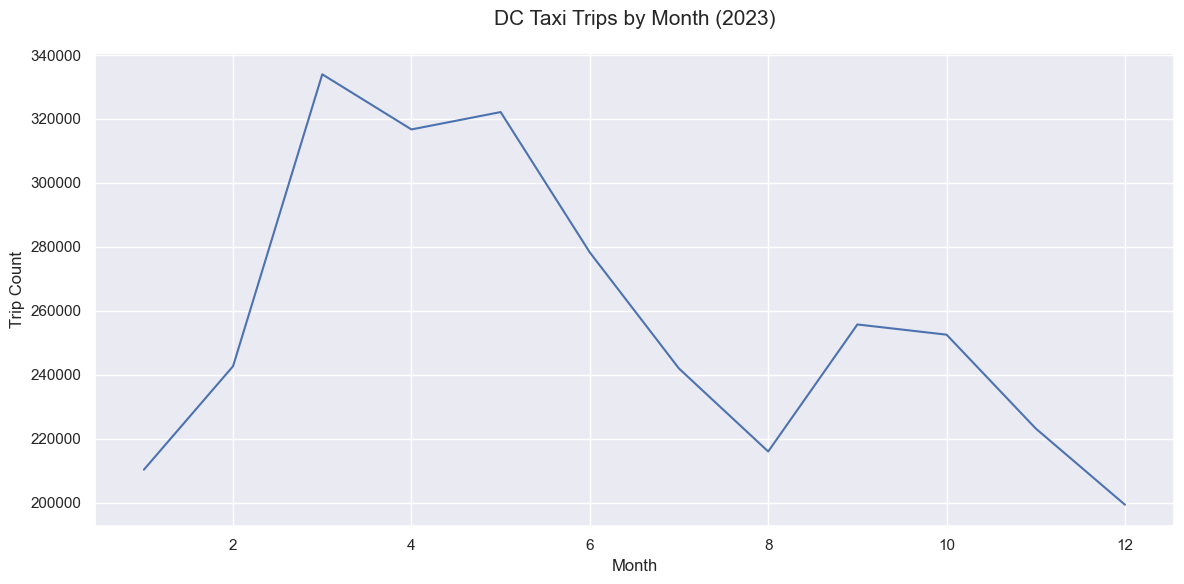

In [155]:
# plot monthly trip counts
%matplotlib inline
sns.set(color_codes=True)

fig, ax = plt.subplots(figsize=(12,6))

trips_monthly.plot(
    x='month', 
    y='count', 
    legend=False, 
    ax=ax
).set_title(
    'DC Taxi Trips by Month (2023)',
    pad=20, fontsize=15)


plt.xlabel('Month', fontsize=12)
plt.ylabel('Trip Count', fontsize=12)

plt.tight_layout()

In [156]:
# transform pickup timestamp column for temporal analysis
## convert UTC date time column to local time zone
taxi_trips['pickup_est'] = taxi_trips['pickup_dt'].dt.tz_localize('UTC').dt.tz_convert('US/Eastern')
## extract hour, weekday name, and weekday number in local time zone
taxi_trips['hour'] = pd.DatetimeIndex(taxi_trips['pickup_est']).hour
taxi_trips['weekday_name'] = pd.DatetimeIndex(taxi_trips['pickup_est']).day_name()
taxi_trips['weekday_num'] = taxi_trips['pickup_est'].dt.dayofweek

taxi_trips.head()

,OBJECTID,FAREAMOUNT,ORIGINZIP,DESTINATIONZIP,MILEAGE,DURATION,ORIGIN_BLOCK_LATITUDE,ORIGIN_BLOCK_LONGITUDE,ORIGINDATETIME_TR,DESTINATIONDATETIME_TR,pickup_dt,month,pickup_est,hour,weekday_name,weekday_num
0,1,15.79,2DA,22202,5.76,852.0,38.896733,-77.009058,01/01/2023 00:00,01/01/2023 00:00,2023-01-01,1,2022-12-31 19:00:00-05:00,19,Saturday,5
1,2,10.81,20011,20011,3.11,650.0,38.952536,-77.003107,01/01/2023 00:00,01/01/2023 00:00,2023-01-01,1,2022-12-31 19:00:00-05:00,19,Saturday,5
2,3,13.51,20001,20007,4.80,539.0,NaN,NaN,01/01/2023 00:00,01/01/2023 00:00,2023-01-01,1,2022-12-31 19:00:00-05:00,19,Saturday,5
3,4,12.97,20005,20024,2.68,1187.0,38.901925,-77.033638,01/01/2023 00:00,01/01/2023 00:00,2023-01-01,1,2022-12-31 19:00:00-05:00,19,Saturday,5
4,5,16.48,20001,20002,5.76,876.0,NaN,NaN,01/01/2023 00:00,01/01/2023 00:00,2023-01-01,1,2022-12-31 19:00:00-05:00,19,Saturday,5


In [157]:
# transform data to visualize hourly trips by weekday
## create pivot table dataframe for graphing
table = pd.pivot_table(
    taxi_trips,
    values = 'OBJECTID', 
    index=['hour'],  
    columns=['weekday_name', 'weekday_num'], 
    sort=['weekday_num'],
    aggfunc='count'
)

table.head(24)


weekday_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
weekday_num,4,0,5,6,3,1,2
hour,,,,,,,
0,5409,4393,7798,8014,4252,3766,3741
1,3417,2567,6117,6429,2513,2156,2306
2,2645,2045,4944,5263,2233,1785,2080
3,2639,2133,3541,3901,2888,2392,2623
4,4593,3522,3448,3424,4892,3719,4363
5,7558,5792,5310,4468,7700,5785,7161
6,10228,7943,7265,6346,10844,8853,10124
7,15457,13821,8661,7868,18435,16866,18772


In [158]:
# sort columns by weekday ascending
sorted_table = table.sort_index(axis='columns', level='weekday_num')

sorted_table.head()

weekday_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
weekday_num,0,1,2,3,4,5,6
hour,,,,,,,
0,4393,3766,3741,4252,5409,7798,8014
1,2567,2156,2306,2513,3417,6117,6429
2,2045,1785,2080,2233,2645,4944,5263
3,2133,2392,2623,2888,2639,3541,3901
4,3522,3719,4363,4892,4593,3448,3424


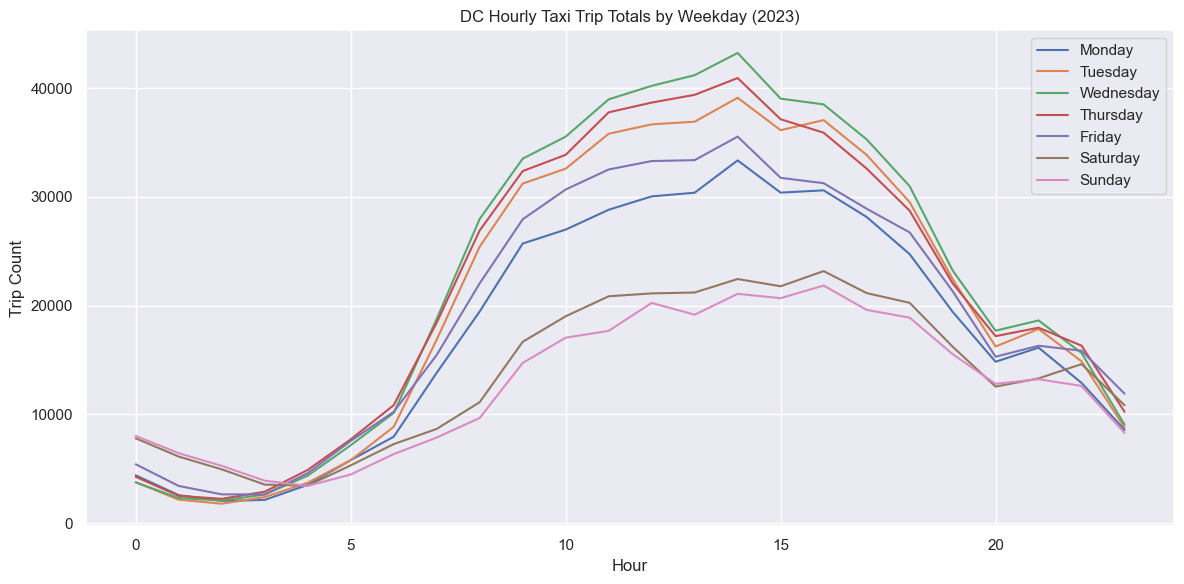

In [159]:
# plot line graph with hourly trip totals grouped by weekday
fig, ax = plt.subplots(figsize=(12,6))

sorted_table.plot(ax=ax).set_title(
    'DC Hourly Taxi Trip Totals by Weekday (2023)')

plt.xlabel('Hour', fontsize=12)
plt.ylabel('Trip Count', fontsize=12)

# provide column name aliases
l = plt.legend()
l.get_texts()[0].set_text('Monday')
l.get_texts()[1].set_text('Tuesday')
l.get_texts()[2].set_text('Wednesday')
l.get_texts()[3].set_text('Thursday')
l.get_texts()[4].set_text('Friday')
l.get_texts()[5].set_text('Saturday')
l.get_texts()[6].set_text('Sunday')

plt.tight_layout()

In [160]:
# remove outliers
trips_speed = taxi_trips[
    (taxi_trips["DURATION"] >= 30.0)
    & (taxi_trips["MILEAGE"] < 90)
    & (taxi_trips["MILEAGE"] != 0)
]

###### CHECK SLIDE WARNING - A value is trying to be set on a copy of a slice from a DataFrame. Try using .loc[row_indexer,col_indexer] = value instead

In [161]:
# calculate average trip speed
trips_speed["avg_speed"] = (trips_speed["MILEAGE"] / trips_speed["DURATION"]) * 60 * 60


C:\Users\Guest.Guest\AppData\Local\Temp\ipykernel_13116\1475319759.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trips_speed["avg_speed"] = (trips_speed["MILEAGE"] / trips_speed["DURATION"]) * 60 * 60


In [162]:
trips_speed_avg = trips_speed.groupby(['hour'])['avg_speed'].mean() \
    .reset_index() \
    .rename(columns={'avg_speed':'avg_hourly_speed'})

trips_speed_avg

,hour,avg_hourly_speed
0,0,37.880667
1,1,35.714511
2,2,34.410050
3,3,25.864821
4,4,26.604161
5,5,28.306873
6,6,28.909195
7,7,23.601315
8,8,19.455917
9,9,19.208272


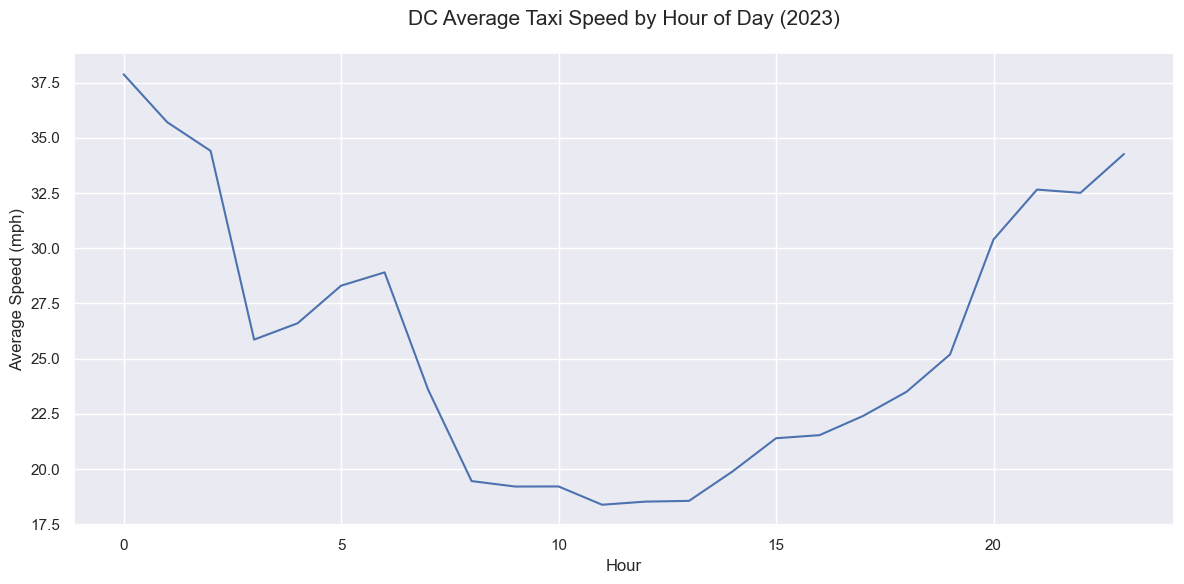

In [163]:
# plot average speed by hour of day
%matplotlib inline
sns.set(color_codes=True)

fig, ax = plt.subplots(figsize=(12,6))

trips_speed_avg.plot(
    x='hour', 
    y='avg_hourly_speed', 
    legend=False, 
    ax=ax
).set_title(
    'DC Average Taxi Speed by Hour of Day (2023)',
    pad=20, fontsize=15)

plt.xlabel('Hour', fontsize=12)
plt.ylabel('Average Speed (mph)', fontsize=12)

plt.tight_layout()

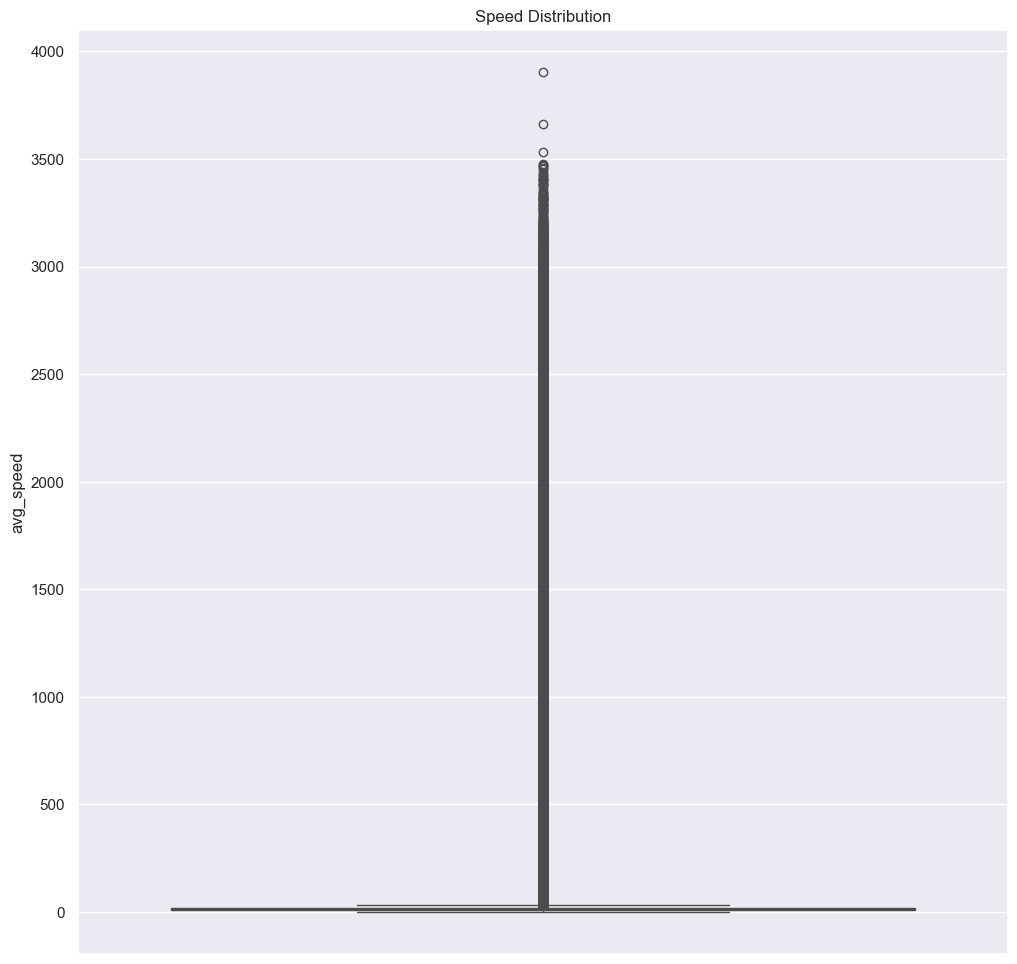

In [164]:
plt.figure(figsize=(12, 12))
sns.boxplot(trips_speed.avg_speed)
plt.title('Speed Distribution')
plt.show()

In [165]:
trips_speed.dtypes

OBJECTID                                       int64
FAREAMOUNT                                   float64
ORIGINZIP                                     object
DESTINATIONZIP                                object
MILEAGE                                      float64
DURATION                                     float64
ORIGIN_BLOCK_LATITUDE                        float64
ORIGIN_BLOCK_LONGITUDE                       float64
ORIGINDATETIME_TR                             object
DESTINATIONDATETIME_TR                        object
pickup_dt                             datetime64[ns]
month                                          int32
pickup_est                datetime64[ns, US/Eastern]
hour                                           int32
weekday_name                                  object
weekday_num                                    int32
avg_speed                                    float64
dtype: object

C:\Users\Guest.Guest\AppData\Local\Temp\ipykernel_13116\3499781140.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trips_speed.avg_speed.groupby(pd.cut(trips_speed.avg_speed, np.arange(0,65,10))).count().plot(kind = 'barh',figsize = (12,6))


Text(0.5, 1.0, 'Speed')

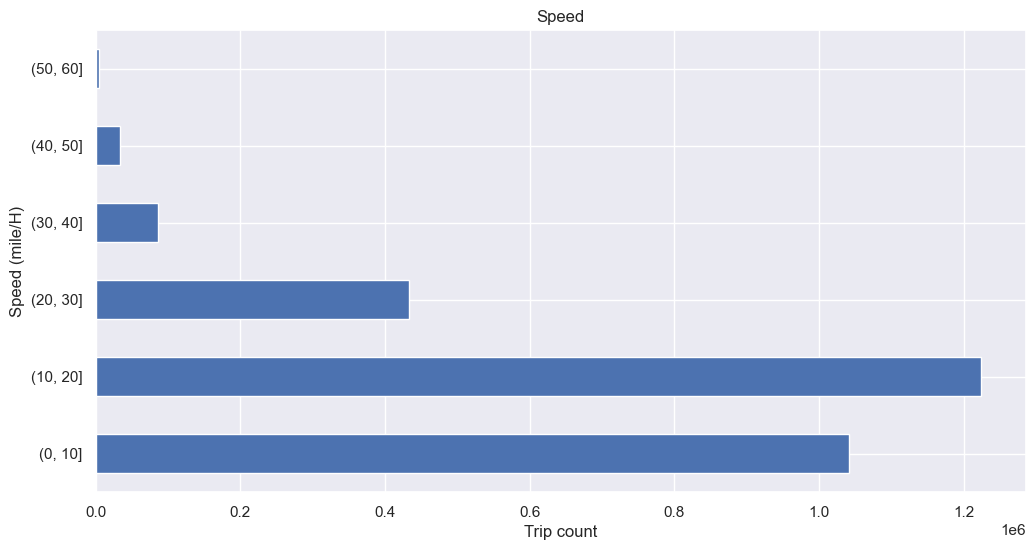

In [168]:
trips_speed = trips_speed[trips_speed.avg_speed <= 65]
trips_speed.avg_speed.groupby(pd.cut(trips_speed.avg_speed, np.arange(0,65,10))).count().plot(kind = 'barh',figsize = (12,6))
plt.xlabel('Trip count')
plt.ylabel('Speed (mile/H)')
plt.title('Speed')